# Importing Libraries

In [1]:
import math #Math module
import numpy as np #Array and computing tools
import pandas as pd #Data analysis and manipulation
import matplotlib.pyplot as plt #Interactive visualizations
import seaborn as sns # Same as matplotlib
import pandas_datareader as pdr #Remote data access
from sklearn.preprocessing import MinMaxScaler #rescale variables 
from keras.models import Sequential #Nuearl Network Model
from keras.layers import Dense, LSTM #RNN LSTM
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

# Data Gathering

In [2]:
#Access historical data of Aboitz Equity Ventures inc. Stock
abtzy_df = pdr.DataReader('ABTZY', data_source='yahoo', start='2020-01-01', end = '2022-10-10')

In [3]:
#Checking Data of Aboitz Equity Ventures inc.
abtzy_df.head

<bound method NDFrame.head of              High    Low   Open  Close  Volume  Adj Close
Date                                                     
2019-12-31  11.06  11.06  11.06  11.06     0.0   10.25704
2020-01-02  11.06  11.06  11.06  11.06     0.0   10.25704
2020-01-03  11.06  11.06  11.06  11.06     0.0   10.25704
2020-01-06  11.06  11.06  11.06  11.06     0.0   10.25704
2020-01-07  11.06  11.06  11.06  11.06     0.0   10.25704
...           ...    ...    ...    ...     ...        ...
2022-10-03   9.73   9.73   9.73   9.73     0.0    9.73000
2022-10-04   9.73   9.73   9.73   9.73     0.0    9.73000
2022-10-05   9.73   9.73   9.73   9.73     0.0    9.73000
2022-10-06   9.73   9.73   9.73   9.73     0.0    9.73000
2022-10-07   9.73   9.73   9.73   9.73     0.0    9.73000

[699 rows x 6 columns]>

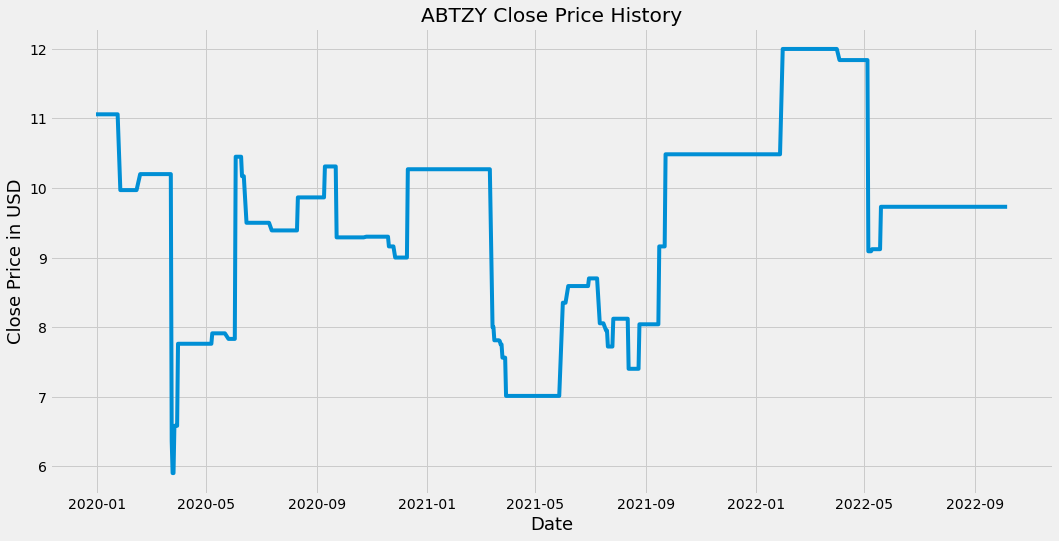

In [4]:
#Visualize Price History of Aboitz Equity Ventures inc., from 2020 - october 10 2022.
plt.figure(figsize=(16,8))
plt.title('ABTZY Close Price History')
plt.plot(abtzy_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()

In [5]:
#Checking rows & colums within the dataset
abtzy_df.shape

(699, 6)

In [6]:
#Checking for null values
abtzy_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
#Checking the number of unique values
abtzy_df.nunique() 

High         44
Low          47
Open         49
Close        41
Volume       31
Adj Close    44
dtype: int64

# Preparing Data

In [8]:
#Creating a data frame with only Closed values
abtzy_data = abtzy_df.filter(['Close'])
abtzy_dataset = abtzy_data.values #Numpy array
abtzy_dataset

array([[11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [11.06000042],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [ 9.97000027],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10.19999981],
       [10

In [9]:
#Train model via rows
abtzy_train_len = math.ceil(len(abtzy_dataset)*.8)
abtzy_train_len

560

In [10]:
#Data Processing via MinMaxScaler
prep_mms = MinMaxScaler(feature_range=(0,1))
abtzy_scaler = prep_mms.fit_transform(abtzy_dataset)
abtzy_scaler

array([[0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.84590171],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.66721315],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704918  ],
       [0.704

In [11]:
#Creating Train dataset
abtzy_train = abtzy_scaler[0:abtzy_train_len,:] #Scaled Data
#Splitting data in to X and y values
X_train = []
y_train = []
#Training within 60 days interval of dataset
for i in range(60, len(abtzy_train)):
    X_train.append(abtzy_train[i-60:i,0])
    y_train.append(abtzy_train[i,0])
    if i<= 61:
        print(X_train)
        print(y_train)
        print()

[array([0.84590171, 0.84590171, 0.84590171, 0.84590171, 0.84590171,
       0.84590171, 0.84590171, 0.84590171, 0.84590171, 0.84590171,
       0.84590171, 0.84590171, 0.84590171, 0.84590171, 0.84590171,
       0.84590171, 0.84590171, 0.66721315, 0.66721315, 0.66721315,
       0.66721315, 0.66721315, 0.66721315, 0.66721315, 0.66721315,
       0.66721315, 0.66721315, 0.66721315, 0.66721315, 0.66721315,
       0.66721315, 0.66721315, 0.704918  , 0.704918  , 0.704918  ,
       0.704918  , 0.704918  , 0.704918  , 0.704918  , 0.704918  ,
       0.704918  , 0.704918  , 0.704918  , 0.704918  , 0.704918  ,
       0.704918  , 0.704918  , 0.704918  , 0.704918  , 0.704918  ,
       0.704918  , 0.704918  , 0.704918  , 0.704918  , 0.704918  ,
       0.704918  , 0.704918  , 0.07540984, 0.        , 0.        ])]
[0.11147538343766283]

[array([0.84590171, 0.84590171, 0.84590171, 0.84590171, 0.84590171,
       0.84590171, 0.84590171, 0.84590171, 0.84590171, 0.84590171,
       0.84590171, 0.84590171, 0.84

In [12]:
#Converting train data into numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

In [13]:
#Reshaping data array
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(500, 60, 1)

# Choosing a Model

In [14]:
#Nueral network Model sequential 
sq_model = Sequential()
sq_model.add(LSTM(50, activation='tanh', return_sequences= True, input_shape = (X_train.shape[1],1))) #LSTM layer
sq_model.add(LSTM(50, activation='tanh', return_sequences= False))
sq_model.add(Dense(25, activation = 'relu')) # Dense layer
sq_model.add(Dense(1, activation = 'relu'))

sq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compile model with opetimer 'adam' and 'mean square error'
sq_model.compile(optimizer='adam', loss='mse')

# Training 

In [16]:
#Fitting data into Training model
sq_model.fit(X_train, y_train, batch_size=1, epochs=1)

500/500 [==============================] - 19s 29ms/step - loss: 0.0135


# Evaluation

In [17]:
abtzy_test = abtzy_scaler[abtzy_train_len - 60:,:]
X_test =[]
y_test = abtzy_dataset[abtzy_train_len:,:]
for i in range (60, len(abtzy_test)):
    X_test.append(abtzy_test[i-60:i, 0])

In [18]:
#Creating test dataset
X_test = np.array(X_test) #numpy array

In [19]:
#Reshape test dataset
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Hyperparameter Tuning

In [20]:
#Acquiring predicted data from test set
abtzy_pred = sq_model.predict(X_test)
abtzy_pred = prep_mms.inverse_transform(abtzy_pred)

5/5 [==============================] - 1s 14ms/step


In [21]:
#Calculating Root mean square error
rmse=np.sqrt(np.mean((abtzy_pred- y_test)**2))
rmse

0.5690534508333084

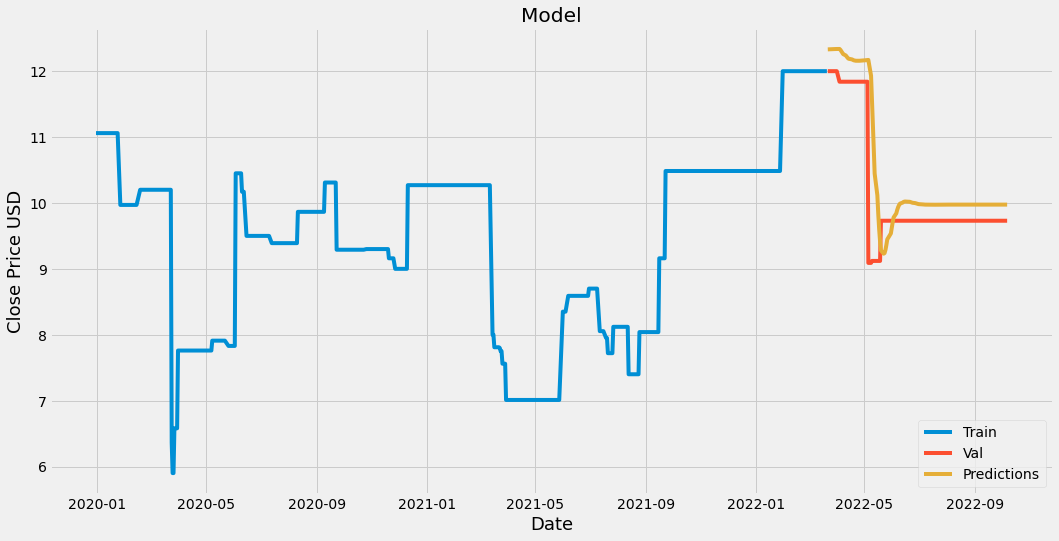

In [22]:
#Plotting Data from model
training = abtzy_data[:abtzy_train_len]
validation = abtzy_data[abtzy_train_len:]
validation['Predictions'] = abtzy_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(training['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')
plt.show()

# Predictions

In [23]:
validation

,Close,Predictions
Date,,
2022-03-22,12.00,12.330770
2022-03-23,12.00,12.331564
2022-03-24,12.00,12.332432
2022-03-25,12.00,12.333315
2022-03-28,12.00,12.334166
...,...,...
2022-10-03,9.73,9.974638
2022-10-04,9.73,9.974638
2022-10-05,9.73,9.974638


In [24]:
validation.to_csv("salmingo_abtzy_forecast.csv")